#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

### **Semana 3**
####**Regresión Logística y métodos de Regularización $L_1$ (lasso), $L_2$ (ridge) y el conjunto $L_{12}$ (elastic net).**

#**Parte - 1: Entendiendo los métodos de Regularización con las métricas $L_1$ y $L_2$.**

Hay que recordar que en general los métodos de aprendizaje automático supervisado tratan de modelar y explicar el comportamiento de una variable de respuesta $y$, a partir de un conjunto de factores de entrada $X$, dado un conjunto de parejas ordenadas $(\vec{x}_k, y_k), k=1,2,...,m$. 

El buen desempeño del modelo se medirá mediante una función de costo que nos permita minimizar el error hasta un mínimo que se considere aceptable por parte del analista. La función de costo puede ser muy variada y los investigadores siguen proponiendo algunas nuevas, pero en particular veamos el caso del método de regresión lineal en detalle para poder ilustrar el problema que nos incumbe en esta semana, el de la **regularización**. Supongamos que el problema es de regresión lineal con dos factores de entrada $x_1$ y $x_2$ y que después del proceso de entrenamiento obtuvimos el modelo $\hat{y} = \omega_0 + \omega_1x_1 + \omega_2x_2$. A los parámetros $\omega_j$ se les conoce también como los **pesos** del modelo. Una manera de medir el error de predicción $\hat{y}_k$ es medir la diferencia o residuo con el valor real observado $y_k$ a través del error cuadrático medio $MSE$ que se define como sigue:

$MSE =\frac{1}{m}\sum_{k=1}^{m}(\hat{y}_k-y_k)^2= \frac{1}{m}\sum_{k=1}^{m}(\omega_0+\omega_1x_{1,k}+\omega_2x_{2,k}-y_k)^2$

donde $x_{j,k}$ indica el factor $x_j$ evaluado en el $k$-ésimo registro. Viendo a $MSE$ como una función de los pesos del modelo, se le suele tomar como la función de costo que se debe minimizar en el conocido método de mínimos cuadrados para el modelo de regresión lineal múltiple. 

En el caso idealizado de que todas las predicciones del modelo entrenado sean exactamente iguales a las reales observadas, $MSE=0$. Sin embargo, en los problemas reales y por el ruido inherente existente en cada problema, dicho error raramente es identicamente igual a cero. 

Por otro lado, sabemos que cuando el modelo empieza a sobreentrenarse durante la etapa de entrenamiento, una de las consecuencias es que los coeficientes $\omega_0$, $\omega_1$, $\omega_2$ empiezan a crecer en magnitud. Es por ello que "regularizar" el modelo, significa restringirlo para evitar que dichos coeficientes aumenten de manera indiscriminada. Y las dos maneras principales de restringir el crecimiento sin control de dichos pesos, es decir, de regularizar el modelo es mediante las llamadas métricas $L_1$ y $L_2$, como sigue:


**Función de costo con métrica de regularización $L_1$. Conocida también como lasso (least absolute shrinkage and selection operator, por sus iniciales en inglés):**

$J_{L_1}(\omega) = MSE + α\sum_{j=1}^{m}|\omega_j|$

**Función de costo con métrica de regularización $L_2$. También conocida como de Tíjonov (en inglés se le conoce como ridge):**

$J_{L_2}(\omega) = MSE + α\sum_{j=1}^{m}\omega_j^2$


**Se pueden combinar ambas en la llamada regularización "elastic net":**


$J_{L_{12}}(\omega) = MSE + α_1\sum_{j=1}^{m}|\omega_j| + α_2\sum_{j=1}^{m}\omega_j^2$

En español es usual referirse a estos métodos de regularización por el uso de la métrica $L1$, $L_2$ y $L_{12}$ correspondiente, o bien, haciendo referencia a ella por sus nombres en inglés, lasso, ridge y elastic-net, respectivamente.

Los parámetros de regularización $\alpha$, $\alpha_1$ y $\alpha_2$ deben ser mayores a cero. El caso igual a cero reduce la función de costo nuevamente a $MSE$.

Es importante hacer las siguientes observaciones: 

*   En cualquiera de los métodos de regularización el parámetro $\omega_0$ no interviene. Es decir, en el caso del método de regresión lineal, solo se regularizan los coeficientes de cada factor de entrada.

*   El sumar los pesos $\omega_j, j=1,...,m$ a la función de costo en la forma indicada en cada caso, permitirá que el proceso de entrenamiento "impida" el crecimiento de los mismos, ya que se está bajo un método de minimización de los errores. 

*   De manera general, con la métrica $L_2$ se castiga a todos los pesos del modelo de manera uniforme y mientras mayor sea el valor de alguno de los coeficientes, mayor es la penalización para todos.

*   De manera general, con la métrica $L_1$, lo factores que el modelo considera que no aportan información para explicar el comportamiento de la variable de salida, los nulifica. Igualmente penaliza a todos los coeficientes(aunque no de manera uniforme), el que alguno de ellos incremente demasiado su valor.

*   Aunque las tres técnicas de regularización tienen el mismo objetivo, el impedir que los pesos crezcan demasiado, cada uno tiene sus propias particularidades como lo veremos en un ejemplo sencillo a continuación.



####**NOTA-Opcional**: Para saber más del tema, puedes consultar la sección llamada "Regularized Linear Models" del capítulo 4 del libro de Aurélien Géron.


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

Definiremos una matriz de entrada X con 3 factores, donde la segunda y tercera son el cuadrado y cubo de la primera. 

La variable de salida será una función cúbica que las relaciona.

Recuerda consultar la documentación de cada función utilizada. Por ejemplo, para las primeras líneas de código:

https://numpy.org/doc/stable/reference/generated/numpy.arange.html

https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

https://numpy.org/doc/stable/reference/generated/numpy.vstack.html 


In [36]:
# Definimos nuestras 3 variables en el intervalo -1.3 a 3.5 como sigue:

x1 = np.arange(-1.3, 3.5, .125)     # factor/variable lineal
x2 = x1*x1                          # factor cuadrático
x3 = x1*x1*x1                       # factor cúbico

In [37]:
# Y definimos nuestra matriz de datos de entrada X como un DataFrame de Pandas:
# La matriz X estará formada por las columnas 1, 2 y 3 con los factores lineal,
# cuadrático y cúbico, respectivamente:

w = np.concatenate((np.vstack(x1),np.vstack(x2),np.vstack(x3)), axis=1)
w.shape

X = pd.DataFrame(w, columns=['x1','x2','x3'])
X.head()

,x1,x2,x3
0,-1.300,1.690000,-2.197000
1,-1.175,1.380625,-1.622234
2,-1.050,1.102500,-1.157625
3,-0.925,0.855625,-0.791453
4,-0.800,0.640000,-0.512000


In [38]:
# Definimos los siguientes pesos de manera arbitraria y que establece una relación
# polinomial cúbica en nuestra variable de salida Y:

w0 = 190
w1= -85/3
w2=-165
w3=160/3

print('Pesos (coeficientes) de una función polinomial de grado cúbico como función de salida:')
print('lineal: %.2f, cuadrático: %.2f cubo: %.2f' % (w1, w2, w3))

Pesos (coeficientes) de una función polinomial de grado cúbico como función de salida:
lineal: -28.33, cuadrático: -165.00 cubo: 53.33


En particular por el momento no nos interesa el valor de $\omega_0$, que equivale el coeficiente constante de la función polinomial. 

Lo que deseamos es ver el comportamiento de los pesos que se estarán regularizando, que en este caso serán $\omega_1, \omega_2$ y $\omega_3$.

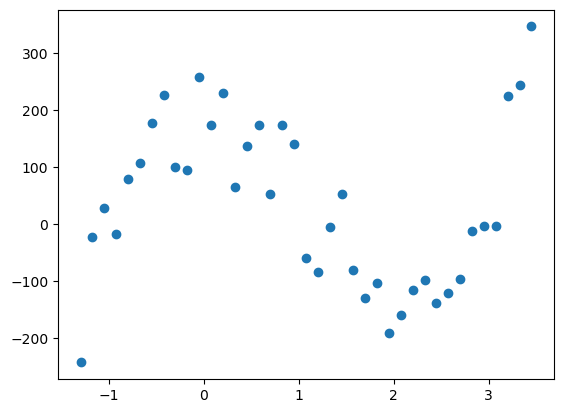

In [39]:
# Definimos nuestra variable de salida con algo de ruido para que nuestro problema
# no se reduzca simplemente a un problema de interpolación de puntos:

random.seed(1)
yreal = []
for x in x1:
  noise=200*(random.random() -0.5)
  cc = w3*np.power(x,3) + w2*np.power(x,2) + w1*x + w0 + noise
  yreal.append(cc)
  
  
plt.scatter(x1,yreal)
plt.show()

Ya tenemos nuestros datos de salida "yreal" a partir de los cuales generar nuestro modelo.

Recuerda revisar la documentación de cada uno de los modelos que aplicaremos:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [54]:
# Definamos 4 modelos: el de regresión lineal múltiple (RLM); de RLM con 
# regularización L1 (lasso); de RLM con regularización L2 (ridge) y
# RLM con regularización conjunta L1 y L2 (elastic-net):  

modelos = []
modelos.append(('LR', LinearRegression()))
modelos.append(('LASSO', Lasso(alpha=30)))  
modelos.append(('RIDGE', Ridge(alpha=30)))  
modelos.append(('EN', ElasticNet(alpha=1, l1_ratio=.5)))


yhat0 = []   # predicciones del modelo RLM
yhat1 = []   # predicciones del RLM con regularización L1
yhat2 = []   # predicciones del RLM con regularización L2
yhat12 = []  # predicciones del RLM con regularización L1 y L2


for name, model in modelos:
  # entrenamos el modelo seleccionado y obtenemos sus predicciones:
  print("%s:" % name)
  mm = model.fit(X, np.ravel(yreal))
  yhat = mm.predict(X)
  
  print(mm.intercept_)   # por si deseas conocer w0.
  print(mm.coef_)       # despleguemos los pesos obtenidos

  if name=='LR':
    yhat0.append(yhat)
    print('\n')
  elif name=='LASSO':
    yhat1.append(yhat)
    print('\n')
  elif name=='RIDGE':
    yhat2.append(yhat)
    print('\n')
  else:
    yhat12.append(yhat)

LR:
194.9163838447491
[ -40.14979812 -179.70350006   58.72754395]


LASSO:
117.13069427863513
[  -0.         -102.25253563   31.42721669]


RIDGE:
88.97294849574081
[-27.51573296 -61.84734688  22.38804271]


EN:
105.4816799994797
[-32.10655264 -79.34645456  28.06434904]


Algunas comentarios que podemos observar de los resultados anteriores:

*   Cuando el parámetro alpha en cualquiera de los modelos con regularización es igual o muy cercano a cero, el resultado será muy parecido al de regresión lineal estándar, LR, lo cual se sigue de las definiciones que dimos al inicio de cada función de costo.

*   Cuando el valor de alpha crece en cualquiera de los modelos de regularización, los pesos disminuyen (ya que tratan de minimizar la función de costo). 

*   Cuando alpha aumenta su valor en el caso Lasso, $L_1$, algunos de los pesos empiezan a tender cero. De hecho, si se sigue aumentando el valor de alpha y en cada caso entrenamos de nuevo el modelo, más pesos seguirán tendiendo a cero. Por ejemplo, modifica y observa los resultados de Lasso para los casos de alpha=0.1, 20, 30 y 65. Es decir, podemos decir que en lasso, algunos de los pesos que el modelo no considera muy relevantes, los castiga más haciéndolos tender a cero.

*   La característica anterior del caso lasso, hace que se utilice en ocasiones como reducción de dimensionalidad, es decir, para reducir el conjunto de factores de entrada que tratan de explicar el comportamiento de la variable de salida. O bien, para determinar aquellos factores que dan mayor información a las predicciones. En este caso observamos que el último peso que queda en Lasso con alpha=65 es precisamente el cúbico, dicéndonos que el comportamiento primordial de los datos es cúbico, lo cual sabemos que este es el caso, ya que así los generamos.

*   La característica del caso ridge, $L_2$, es que a diferencia de lasso, ahora al aumentar el valor de alpha, todos los pesos serán análogamente penalizados, haciéndolos tender todos a cero pero sin anular alguno de ellos de manera rápida antes que los demás. Por ejemplo, asigna los mismos valores de alpha usados en lasso ahora en ridge e inclusive agrega otros como 100 o 1000 y observa que a diferencia de lo que vimos con lasso, en ridge no se hace exactamente cero uno de los pesos antes que los demás.

NOTA: Aunque sabemos que en la vida real los datos no se comportan como en este ejercicio, el ejercicio nos ayuda a entender sus comportamientos generales.


###**Visualicemos algunos de los resultados**

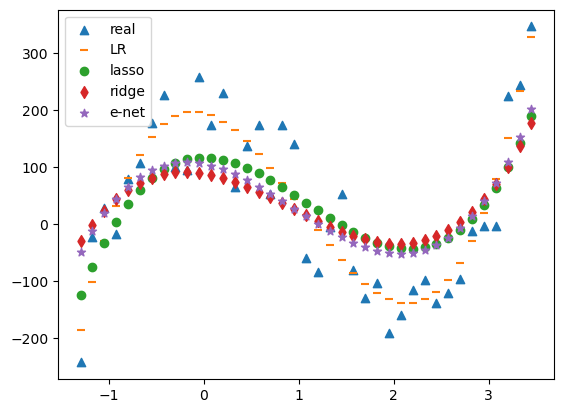

In [8]:
plt.scatter(x1, np.ravel(yreal), marker='^', label='real')  

plt.scatter(x1, np.ravel(yhat0), marker='_', label='LR')  
plt.scatter(x1, np.ravel(yhat1), marker='o', label='lasso')  
plt.scatter(x1, np.ravel(yhat2), marker='d', label='ridge')  
plt.scatter(x1, np.ravel(yhat12), marker='*', label='e-net')

plt.legend(loc=2)
plt.show()

Del gráfico anterior, del caso con $\alpha=30$ en lasso y ridge, podemos hacer algunas observaciones generales:

*   En general el modelo sin regularización tiende a querer parecerse lo más rápido posible a los datos reales observados. Si existe una gran cantidad de valores extremos (outliers), esto aumentará la varianza de las predicciones generadas con el modelo obtenido.
*   El modelo con las predicciones más cercanas a los datos observados reales tiene los coeficientes mayores en magnitud.
*   Observamos que las predicciones del modelo lasso siguen siendo bastante análogas a las de ridge y elastic-net, aún cuando uno de sus coeficientes es igual a cero. Como se mencionó previamente, lasso trata de reducir la cantidad de factores de entrada o dimensionalidad, quedándose con las más representativas y sin sacrificar demasiado el desempeño del modelo.
*   Los modelos con regularización generan modelos más "moderados" que posteriormente permiten obtener mejores predicciones para los valores reales nuevos, sobre todo cuando existe una buena cantidad de valores extremos (outliers). En este ejemplo en particular que no tenemos valores extremos muy marcados, vemos que los métodos con regularización penalizaron demasiado a todos estos modelos de manera negativa, ya que se alejaron demasiado de los valores reales. 



#**Parte - 2: Caso aprobación de tarjetas de crédito** 

La asignación o rechazo a la solicitud de un crédito a un banco o institución financiera es uno de los problemas más estudiados por su complejidad y relevancia. Existe una gran cantidad de artículos de investigación al respecto. Debido a lo delicado de la información que ahí se analiza no es fácil encontrar bases de datos abiertas con las cuales se puedan estar realizando estudios. Sin embargo, en particular el conjunto de datos conocido como "Australian credit approval" es una de las pocas en el tema y que podemos encontrar en el repositorio de la UCI en la siguiente liga:

https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29

El objetivo es determinar si se autoriza una tarjeta de crédito dada cierta información del solicitante.

Revisa la información que se encuentra en la página anterior para que tengas mayor información sobre la naturaleza de los datos y del problema. 


In [55]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [56]:
mypath = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"

data = pd.read_csv(mypath, sep=" ", header=None)

data.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','class']

print(data.shape)
data.head()

(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


###**Variables Categóricas y Numéricas**

Los nombres de las variables fueron eliminados para cuidar la privacidad de los solicitantes, sin embargo se informa que de las 14 variables de entrada, 8 son categóricas y 6 numéricas.  

La última columna es la variable binaria de salida que nos dice si la tarjeta de crédito se autorizó (1) o no se autorizó (0).

De acuerdo a la información de la página de la UCI las siguientes 8 variables de entrada son las categóricas:

A1 (binaria), A4 (3 niveles), A5 (14 niveles), A6 (9 niveles), A8 (binaria), A9 (binaria), A11 (binaria), A12 (3 niveles).

El resto de las 6 variables de entrada las definen como numéricas continuas: 

A2,  A3,  A7,  A10,  A13,  A14.

Con el fin de simplificar el análisis de preparación de los datos adelantamos que varios de los niveles de las variables categóricas tienen muy bajas frecuencias. Algunos tienen por ejemplo 1 solo registro, lo cual hace imposible el querer inferir algo sobre dicho nivel. Por ello agruparemos a continuación algunos de los niveles más bajos bajo el criterio de que al menos cada nivel en cada factor tenga al menos un 5% de información. Existen varias reglas empíricas sobre esta cantidad mínima en cada nivel y la del 5% es una de las más comunes, así que es la que seguiremos en este ejemplo. 

Aplicaremos la transformación map() de Python para llevar a cabo la agrupación de los niveles de menor frecuencia indicadas mediante un diccionario. En la notación a:b, el entero "a" es sustituido por "b", como se indica a continuación. 

Estaremos asignando y agrupando a un mismo nivel 0 a todos aquellos niveles de baja frecuencia.



In [59]:
# Por ejemplo, veamos cómo se distribuyen los niveles en el caso del factor A4:

data['A4'].value_counts()

2    525
0    165
Name: A4, dtype: int64

Lleva a cabo la inspección de los demás factores categóricos:

In [60]:
data['A4'] = data['A4'].map({2:2, 1:0, 3:0})
data['A5'] = data['A5'].map({1:1,2:0,3:3,4:4,5:0,6:6,7:7,8:8,9:9,10:0,11:11,12:0,13:13,14:14})
data['A6'] = data['A6'].map({1:1,2:0,3:0,4:4,5:5,7:0,8:8,9:0})

In [61]:
# Ahora sí, definamos nuestras variables de entrada y de salida, observa que ambas son DataFrames de Pandas:

X = data.iloc[:,:-1]  

Y = data.iloc[:,-1]     # También puede ser: data[['class']]     

Consideraremos un $20\%$ de datos en el conjunto de prueba y dejaremos el resto, $80\%$, para utilizar en validación-cruzada.

In [62]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)  

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(552, 14) : dimensión de datos de entrada para entrenamiento y validación
(138, 14) : dimensión de datos de entrada para prueba
(552,) : dimensión de variable de salida para entrenamiento y validación
(138,) : dimensión de variable de salida para prueba


El argumento "stratify=Y" permite generar las particiones conservando el mismo porcentaje de cada clase en cada subconjunto. Otra manera de interpretar el uso de este argumento es decir que la distribución de las clases del conjunto de entrenamiento utilizado para generar el modelo, será la misma que la distribución de las clases que tendrán los datos en la vida real.   

Solo para verificar que no estamos con un problema de clases desbalanceadas, problema que abordaremos en semanas más adelante, obtengamos el porcentaje de datos en cada clase de la variable de salida. Esto lo podemos obtener sumando los casos positivos (1) y dividéndolos por el total de registros:



In [15]:
ytv.sum() / ytv.shape[0]

0.44565217391304346

Tenemos así que las clases de créditos aprobados (1) y no aprobados (0) están distribuidos en un $44.5\%$ y $55.5\%$, respectivamente. Esto nos dice que podemos considerarlo como un problema de clases balanceadas, que para el caso biclase teóricamente debe ser del $50\%$ cada uno.

**NOTA:** Habrás observado que en este último paso utilizamos información de los datos de validación junto con los de entrenamiento, e inclusive al utilizar el argumento "stratify=Y" en la función "train_test_split", estamos utilizando también información de todo el conjunto de datos de la variable de salida para determinar el porcentaje de cada clase, lo cual estricamente lleva a un problema de filtración de información. Sin embargo, tomando en cuenta que las particiones son aleatorizadas, podemos simplificar los procesos y suponer que los porcentajes en cada caso serán relativamente muy parecidos. Además, como vamos a utilizar validación-cruzada, lo cual modifica en cada partición los conjuntos de entrenamiento y validación, habría que calcular el porcentaje de cada clase en cada partición solamente usando los datos de entrenamiento y luego promediarlos, es lo correcto, pero en general no se hace así ya que las diferencias son despreciables si se hace de manera aleatorizada. Aquí es donde también entra el criterio de un buen científico de datos para saber tomar decisiones que aunque a veces no son cien por ciento como dice la teoría, son lo suficientemente acertadas para saber que las diferencias obtenidas son despreciables. 

In [63]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['A2','A3','A7','A10','A13','A14']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = [ 'A4','A5','A6','A12']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

Más adelante estaremos estudiando los modelos que se muestran a continuación. Por el momento veámoslos simplemente como métodos de aprendizaje supervisado los cuales estamos comparando para ver cuál nos ayuda a predecir mejor la autorización o no de las tarjetas de crédito.

Observa que estaremos concatenando los modelos y sus nombres en dos listas diferentes, para posteriormente llevar a cabo el entrenamiento de cada uno de ellos de manera secuensial. 

Recuerda que una manera general de empezar a abordar un problema en el área de aprendizaje automático es partiendo del entrenamiento de varios modelos diferentes con sus valores de agrumentos predeterminados para una primera comparación. Sin embargo, con el fin de evitar errores posteriores de no convergencia estamos modificando ligeramente algunos de ellos como se muestran a continuación. 

Puedes ir revisando la documentación de cada uno de estos métodos en scikit-learn. 

In [17]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # MLP - Red Neuronal Artificial / Perceptrón Lineal Multicapa:  
  modelos.append(MLPClassifier(hidden_layer_sizes=(30,), max_iter=3000))
  nombres.append('MLP')
  
  # SVM - Máquina de Vector Soporte:
  modelos.append(SVC(gamma='scale'))
  nombres.append('SVM')

  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier())
  nombres.append('kNN')
  
  return modelos, nombres

Llevamos a cabo el entrenamiento usando el Pipeline para la transformación de los datos y que nos ayuda a evitar el filtrado de información de los datos entre los conjuntos de validación y prueba. 

Usaremos validación-cruzada (cross-validation, CV) con su variante de repetir el proceso además varias veces (nosotros lo haremos 3 veces) y donde las particiones se generan estratificadas, para respetar en lo posible la distribución de las clases en cada partición del CV. Revisa la siguiente liga de su documentación:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html

In [64]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)


  resultados.append(scores)
  print('>> %s: %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))

>> LR: 0.862 (0.038)
>> DT: 0.815 (0.053)
>> MLP: 0.844 (0.040)
>> SVM: 0.857 (0.044)
>> kNN: 0.814 (0.038)


Observamos que el modelo de regresión logística es el obtiene el mejor desempeño promedio con respecto a la métrica de exactitud (accuracy). Entre paréntesis se muestra la desviación estándar de cada resultado.

Mostremos también sus diagramas de caja y bigotes para visualizar mejor la variabilidad de cada resultado:

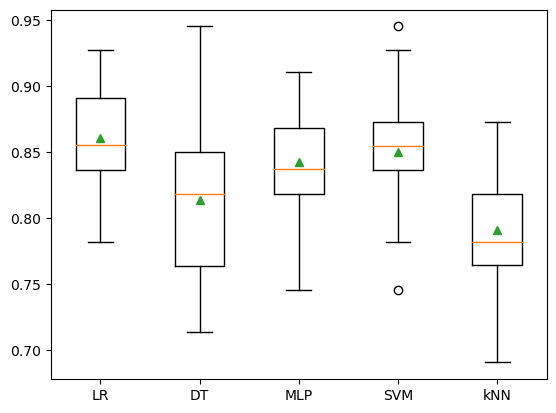

In [19]:
plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

##**Regresión Logística con regularizaciones $L_1$ y $L_2$:**

Ya que la regresión logística fue la de mejor desempeño en cuanto a promedio en el entrenamiento anterior, realicemos un nuevo entrenamiento aplicando ahora las técnicas de regularización. Lo haremos de manera análoga a como procedimos anteriormente. Sin embargo, ahora usaremos los argumentos de la función LogisticRegression de scikit-learn para implementar cada uno de los casos de regularización. Esto simplemente para mostrar las diversas formas que en general se puede llegar a implementar un mismo proceso. Posiblemente no se obtenga exactamente el mismo resultado usando ambos casos, pero se esperaría que fueran aproximadamente análogos.

En este caso debes revisar la documentación para ver cuáles argumentos son adecuados en cada método de regularización ya que no todas las combinaciones son posibles, generando errores de ejecución en algunas de ellas. Para evitarlo revisa la liga de la documentación correspondiente:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 

Y nuevamente se han modificado algunos de los valores predeterminados en algunos de ellos para que cada uno converja durante el proceso de entrenamiento.

In [88]:
#from pandas.core.common import random_state

def get_modelsRegs():
  modelos, nombres = list(), list()

  # LR - sin regularización:
  modelos.append(LogisticRegression(penalty='none', solver='lbfgs', max_iter=2000, random_state=1))
  nombres.append('LR')

  # Lasso:
  modelos.append(LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, C=1., random_state=1))
  nombres.append('LASSO')
  
  # Ridge:
  modelos.append(LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000, C=10.01, random_state=1))
  nombres.append('RIDGE')
  
  # Elastic-Net:
  modelos.append(LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=4000, C=1., random_state=1))
  nombres.append('EN')

  return modelos, nombres

>> LR 0.867 (0.051)
>> LASSO 0.866 (0.050)
>> RIDGE 0.868 (0.049)
>> EN 0.868 (0.049)


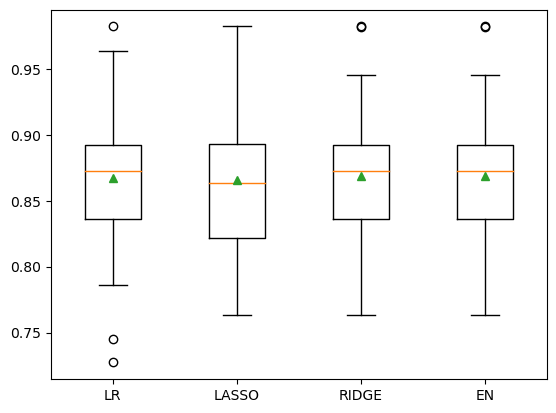

In [87]:
modelos, nombres = get_modelsRegs()
resultados = list() 

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)

  resultados.append(scores)
  print('>> %s %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))


plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

### **Actividad-comentario en Canvas:**

**1. Con base a la exactitud y desviación estándar de cada modelo mostrados en los resultados anteriores, ¿qué puedes decir del modelo generado? ¿Ayudan en este caso el uso de las técnicas de regularización para obtener un mejor modelo? ¿Podríamos considerar las diferencias mostradas entre ellos suficientes como para hablar de que uno de ellos es mejor que los otros?** 

R: De acuerdo con las métricas generadas, el desempeño es muy similar entre los diferentes modelos. El modelo Ridge fue que el que tuvo un mejor promedio, sin embargo las diferencias entre uno y otro son muy pequeñas.

**2. Realiza ajustes a los argumentos de algunos de los modelos y observa si puedes obtener un mejor resultado, al menos en cuanto a su promedio general.**

R: Se probó el modelo para los siguientes valores (filas en negritas representan los valores originales para el parámetro C):

| Modelo          | Valor C   | Promedio  | DE        |
|-----------------|-----------|-----------|-----------|
| **Ridge**       | **10.01** | **0.868** | **0.049** |
| Ridge           | 1         | 0.870     | 0.046     |
| Ridge           | 0.05      | 0.863     | 0.044     |
| Ridge           | 0.033     | 0.857     | 0.046     |
| Lasso           | 10.01     | 0.866     | 0.050     |
| **Lasso**       | **1**     | **0.865** | **0.047** |
| Lasso           | 0.05      | 0.860     | 0.040     |
| Lasso           | 0.033     | 0.860     | 0.040     |
| Elastic Net     | 10.01     | 0.868     | 0.049     |
| **Elastic Net** | **1**     | **0.851** | **0.041** |
| Elastic Net     | 0.05      | 0.853     | 0.041     |
| Elastic Net     | 0.033     | 0.851     | 0.041     |

De la tabla anterior se observa que el promedio de Ridge mejora para un valor C = 1, donde se obtiene un 0.870. En el caso de Lasso y Elastic Net, se obtienen mejores valores para C = 10.01.


**3. ¿Qué podrías concluir al respecto?**

La relación de C con el parámetro de penalidad λ es el siguiente: C = 1/λ. Esto significa que a medida que C se hace pequeña, el parámetro de penalidad λ aumenta.

Tomando en cuenta lo anterior y los resultados obtenidos en la tabla presentada arriba, en general se observa que a medida que se aumenta la penalización (disminuyendo el valor C), los modelos obtienen peores desempeños.

Lo anterior podría ocurrir si los datos reales son muy parecidos a los datos de entrenamiento y es raro encontrar la presencia de datos atípicos. Ante este escenario, no sería beneficioso aplicar regularizaciones con una penalidad muy alta, ya que el modelo quedaría subentrenado.

**4. ¿Se obtuvo un un buen ajuste en alguno de los modelos?**

Si, se logró mejor ajuste para el modelo Ridge, usando un parámetro C = 1. Sin embargo, cabe destacar que la diferencia no es significativa.

5. **¿Están subentrenados?**

Se podría concluir que si se aumenta considerablemente la penalidad de los modelos, entonces se tiene un modelo subentrenado, ya que el accuracy promedio comienza a disminuir. 

Lo anterior puede observarse por medio de la tabla mostrada arriba. 

6. **¿Están sobreentrenados?**

Solo con la información presentada, no es posible contestar la pregunta. Para este ejemplo solo se cuenta con el score del set de pruebas (cross_val_score), y se requiere también la información del score del set de entrenamiento para compararse con el de pruebas, el cual se puede obtener por medio de la función cross_validate.

7. **¿Qué otra información necesitarías para responder estas preguntas?**

La siguiente información podría ser usada como complemento para responder mejor estas preguntas:

* Matriz de confusión para evaluar accuracy, precision y recall
* Los scores de los datos de entrenamientos, además de los datos de prueba.

##**Llevando a cabo el mejor ajuste (fine tuning)**

Observamos que aunque de manera mínima se obtuvo que el modelo de regresión logística con regularización ridge $L_2$ fue el más alto, así que a manera de ejemplo continuemos con el ejercicio para mostrar la manera de encontrar una mejor configuración de los hiperparámetros mediante la llamada búsqueda por malla (grid search en inglés). 

Recuerda revisar la documentación correspondiente cada vez que uses un nuevo método o función, en particular revisa las siguientes dos que utilizaremos a continuación:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

Podemos realizar una búsqueda con varias opciones de los valores de algunos de los hiperparámetros y acelerar el proceso de búsqueda mediante el uso de las funciones llamados de malla, que probarán un conjunto de combinaciones durante un mismo proceso de entrenamiento. Si se tienen los recursos computacionales adecuados este timpo de entrenamiento puede ser paralelizable.

Las diferentes opciones para cada parámetro seleccionado se indican a través de un diccionario. Los diccionarios son un tipo muy importante de estructura para colecciones de datos en un formato dado como "clave:valor". Si no conoces los diccionarios y no lo has trabajado dentro de Python, te recomendamos revisar primero la siguiente documentación al respecto, antes de seguir adelante:

https://docs.python.org/3/tutorial/datastructures.html#dictionaries 

Ahora utilicemos un diccionario para indicar las diferentes opciones de valores que tomará cada argumento que hemos seleccionado para la función de regresión logística. Observa el formato "clave:valor" del diccionario "dicc_grid" definido a continuación, donde en particular para el modelo ridge las "claves" que estamos considerando son los métodos de optimización, indicados por "solver" y la constante "C" que rige el nivel de resticción de la métrica $L_2$ que se está aplicando.

In [23]:
# RIDGE - métrica L2:

modelo = LogisticRegression(penalty='l2', max_iter=10000, random_state=1)

dicc_grid = {'C':[0.0001,0.01,0.1,1.0,10.,100.],
             'solver':['newton-cg','lbfgs','liblinear','sag','saga']
             }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring='accuracy')


In [24]:
# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(Xtv)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6)(5)=30 
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruzada,
# lo cual implica también un mayor tiempo de entrenamiento.

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.8695389610389609
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 100.0, 'solver': 'liblinear'}
Métrica utilizada: accuracy


Obtenemos una mejoría mínima de aproximadamente un $0.05\%$ en cuanto al promedio general de la exactitud, en relación con el valor de la regularización ridge que habíamos obtenido previamente.

Puedes intentar modificar los valores de estos hiperparámetros alrededor de estos valores encontrados para ver si puedes incrementar aún más dicho valor promedio. En particular se podrían intentar valores alrededor de C=100.

##**Modelo Final con el conjunto de prueba y conclusiones**

Finalmente obtuvimos que una de las mejores configuraciones fue la regresión logística con el método de regularización $L_2$. Habría que evaluar si realmente consideramos que dicha diferencia obtenida es suficientemente mayor a la del modelo de regresión lineal sin regularización y con los parámetros predeterminados, o bien aplicar el criterio de la navaja de Ockham y quedarnos con el modelo más simple. Aunque en un challenge como los que propone Kaggle dicha diferencia mínima sería suficiente para determinar un ganador y por lo tanto valdría la pena realizar dicho ajuste.

Con base a nuestro ejemplo ilustrativo, continuemos finalmente con los hiperparámetros encontrados para el mejor resultado de regularización con métrica $L_2$ encontrado, a saber, regresión logística con regularización ridge y valores de C=100.0, solver=liblinear.

Para ello usemos por último el conjunto de prueba, que hasta ahora no habíamos utilizado.

In [25]:
modelo = LogisticRegression(penalty='l2', 
                            max_iter=10000,
                            C=100.0,
                            solver='liblinear',
                            random_state=1)

# Entrenamos el modelo por última vez con los datos de entrenamiento y validación conjuntos:
Xct = columnasTransformer.fit(Xtv)
Xxt = Xct.transform(Xtv)
modelo.fit(Xxt, np.ravel(ytv))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(Xtest)
print(modelo.score(Xxtest, np.ravel(ytest)))

0.8405797101449275


Así, finalmente podemos decir que el desempeño promedio de nuestro modelo será del $84.06\%$ cuando se utilice en producción con los nuevos datos reales. 

En realidad antes de llevarlo a producción debemos verificar que el modelo no esté subentrenado o sobreentrenado. De hecho esta pregunta te la hicimos anteriormente, pero volveremos a abordar este tema con estos mismos datos la semana entrante.

Por último veamos la manera en que nuestro modelo final lleva a cabo las prediciones de cada clase, se autoriza o no la tarjeta de crédito, mediante el uso de la llamada matriz de confusión: 

In [26]:
pp = modelo.predict(Xxtest)
cm = confusion_matrix(ytest, pp)
print(cm)

[[61 16]
 [ 6 55]]


La matriz de confusión nos ayuda a visualizar la manera en que nuestro modelo está llevando a cabo las predicciones, es decir, la manera en que realiza predicciones correctas o incorrectas.


###**Para entender el concepto de la matriz de confusión, realiza la lectura de la subsección "Confusion Matrix" del capítulo 3, "Classification", sección "Performance Measures" del libro de Aurélien Géron.**

Igualmente puedes consultar la documentación de scikit-learn sobre el mismo tema:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Se puede obtener una mejor visualización de la matriz de confusión mediante las siguientes instrucciones con la librería seaborn. 

Ver la documentación correspondiente:

https://seaborn.pydata.org/generated/seaborn.heatmap.html



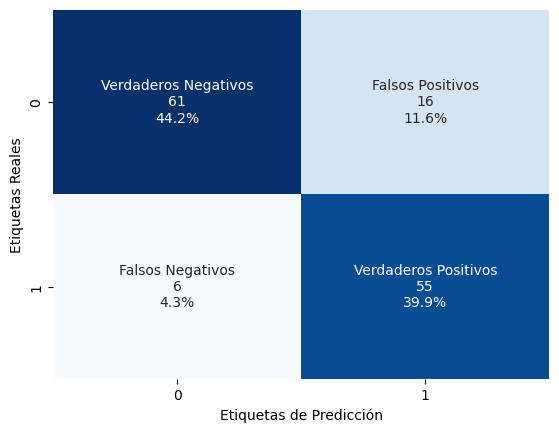

In [27]:
txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

En particular observamos que las predicciones de falsos positivos es mayor que la de falsos negativos. ¿Crees que esto sea lo mejor? Es decir, qué resultaría más costoso para el banco ¿autorizar una tarjeta de crédito a un mal cliente (falso positivo), o negársela a un buen cliente (falso negativo)? ¿Qué información adicional necestitarías para contestar adecuadamente estas preguntas?

Como primera respuesta, yo diría que saldría mas costoso para el banco autorizar una tarjeta a un mal cliente, sin embargo, yo buscaría contestar las siguientes preguntas para poder determinar que sería mejor:

1. ¿Cuál es la morosidad de los malos clientes? Cómo le afecta al banco en términos de flujo de caja?
2. ¿Cómo se compara la morosidad de los malos clientes de los buenos clientes?
3. ¿Cuál es el monto promedio de mora de los malos clientes?
4. ¿Qué porcentaje de nuestros clientes se consideran como malos? Existe alguna ley que nos diga si hay que tener un tope de clientes morosos?
5. Por último, pero no menos importante, ¿qué quiere lograr el banco con el modelo? ¿Aumentar los buenos clientes o disminuir los malos clientes?

###**--Fin de la actividad--**